In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv("stocks.csv")

print(df.head())
print(df.info())
print(df.describe())


  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-nul

In [4]:
# Data Preprocessing
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort values by Date
df = df.sort_values(by='Date')

# Check missing values
print(df.isnull().sum())


Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
# Company Wise Split
companies = df['Ticker'].unique()
print(companies)


['AAPL' 'MSFT' 'GOOG' 'NFLX']


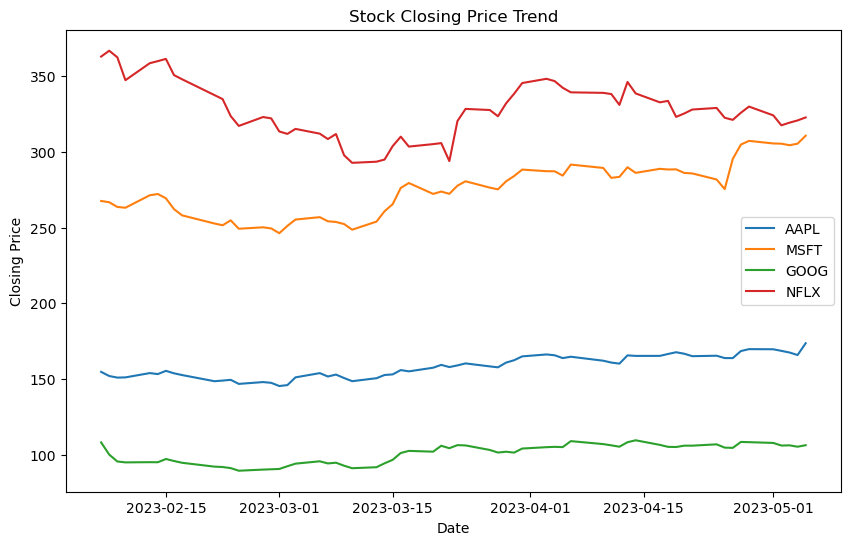

In [9]:
# Closing Price Trend
plt.figure(figsize=(10,6))

for company in companies:
    company_data = df[df['Ticker'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.show()


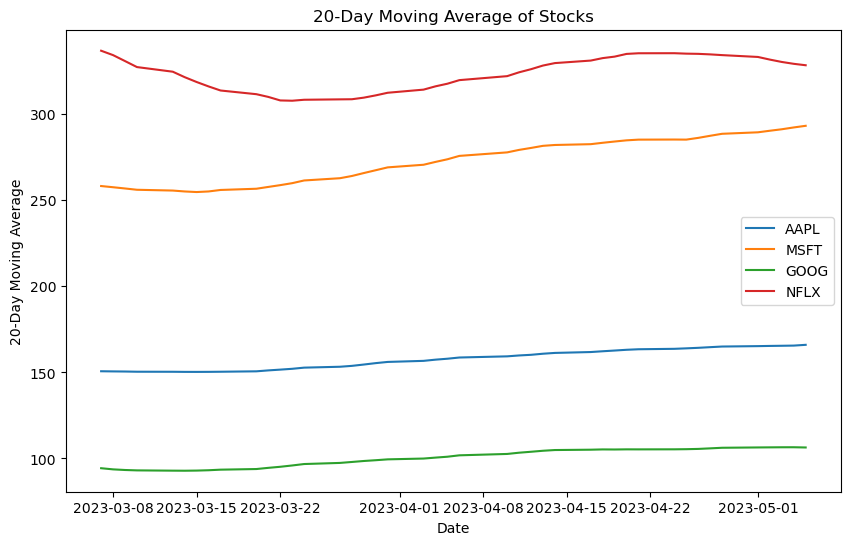

In [10]:
# Moving Average
df['MA_20'] = df.groupby('Ticker')['Close'].transform(
    lambda x: x.rolling(window=20).mean()
)

plt.figure(figsize=(10,6))

for company in companies:
    company_data = df[df['Ticker'] == company]
    plt.plot(company_data['Date'], company_data['MA_20'], label=company)

plt.xlabel("Date")
plt.ylabel("20-Day Moving Average")
plt.title("20-Day Moving Average of Stocks")
plt.legend()
plt.show()


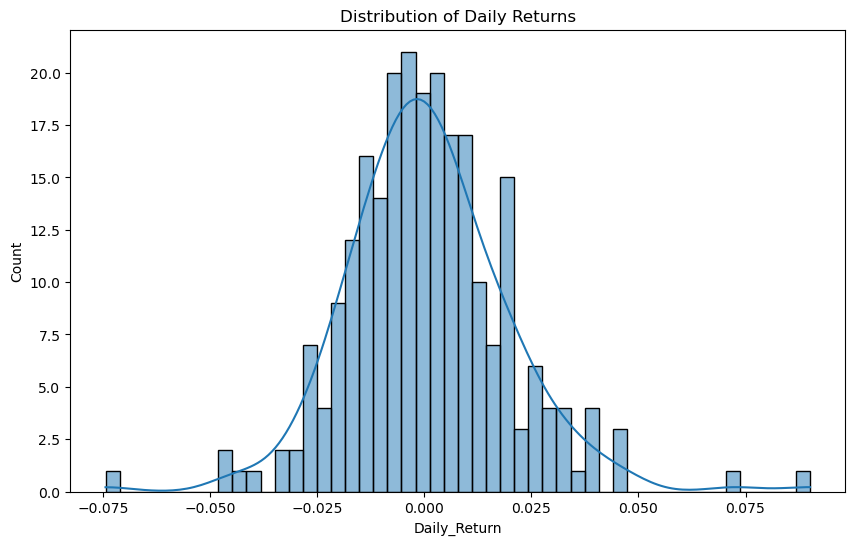

In [11]:
# Daily Returns
df['Daily_Return'] = df.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(10,6))
sns.histplot(df['Daily_Return'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()


In [16]:
# Some Extra Analysis


In [17]:
# Volatility Analysis
volatility = df.groupby('Ticker')['Daily_Return'].std()
print("Stock Volatility:")
print(volatility)


Stock Volatility:
Ticker
AAPL    0.014152
GOOG    0.020710
MSFT    0.017881
NFLX    0.022481
Name: Daily_Return, dtype: float64


Ticker      AAPL      GOOG      MSFT      NFLX
Ticker                                        
AAPL    1.000000  0.901662  0.953037  0.154418
GOOG    0.901662  1.000000  0.884527  0.201046
MSFT    0.953037  0.884527  1.000000  0.191273
NFLX    0.154418  0.201046  0.191273  1.000000


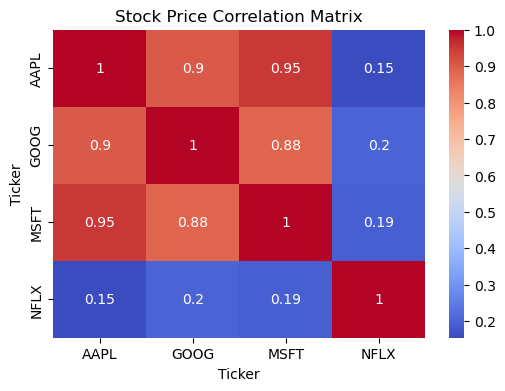

In [18]:
# Correlation Analysis
pivot_df = df.pivot(index='Date', columns='Ticker', values='Close')

corr_matrix = pivot_df.corr()
print(corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Stock Price Correlation Matrix")
plt.show()


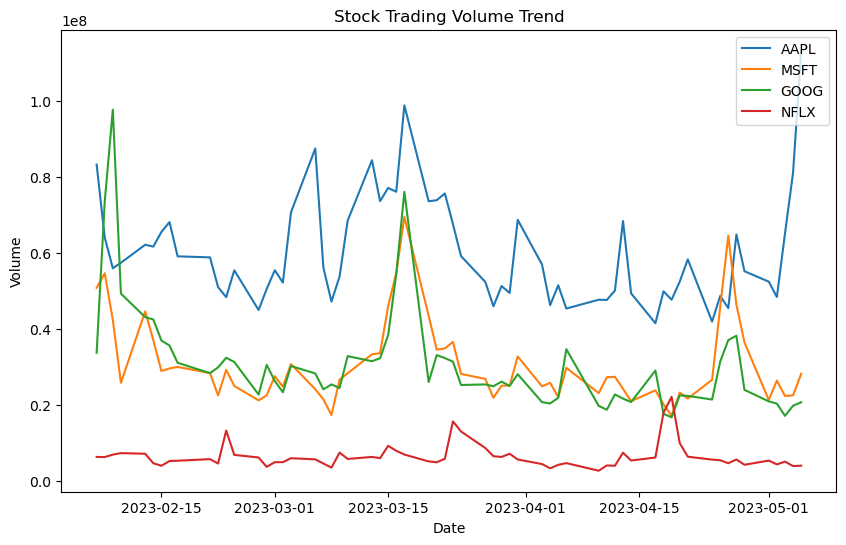

In [19]:
# Volume Analysis
plt.figure(figsize=(10,6))

for company in companies:
    company_data = df[df['Ticker'] == company]
    plt.plot(company_data['Date'], company_data['Volume'], label=company)

plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Stock Trading Volume Trend")
plt.legend()
plt.show()
